In [31]:
from keras.models import Sequential, Input, Model
from keras.layers import Conv2D, Conv2DTranspose, concatenate, UpSampling2D, BatchNormalization

IMAGE_SIZE = 160

input = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input)
c2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=2)(c1)
c3 = Conv2D(128, (3,3), activation='relu', padding='same')(c2)
c4 = Conv2D(256, (3,3), activation='relu', padding='same', strides=2)(c3)
c5 = Conv2D(256, (3,3), activation='relu', padding='same')(c4)
c6 = Conv2D(512, (3,3), activation='relu', padding='same', strides=2)(c5)
c7 = Conv2D(512, (3,3), activation='relu', padding='same')(c6)

u1 = UpSampling2D((2, 2))(c7)
u2 = concatenate([u1,c5])
u3 = Conv2D(64, (3,3), activation='relu', padding='same')(u2)
u4 = UpSampling2D((2, 2))(u3)
u5 = concatenate([u4, c3])
u6 = Conv2D(32, (3,3), activation='relu', padding='same')(u5)
u7 = UpSampling2D((2, 2))(u6)
u8 = concatenate([u7, c1])
u9 = Conv2D(16, (3,3), activation='relu', padding='same')(u8)
output = Conv2D(3, (3, 3), activation='relu', padding='same')(u9)
model = Model(inputs=input, outputs=output)
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_139 (Conv2D)            (None, 160, 160, 64  1792        ['input_14[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_140 (Conv2D)            (None, 80, 80, 128)  73856       ['conv2d_139[0][0]']             
                                                                                           

In [ ]:
# !unzip -uq "/content/drive/MyDrive/colab/hoc lai/gray_color/color_1001.zip" -d "/content/drive/MyDrive/colab/hoc lai/gray_color/color"

In [ ]:
# !unzip -uq "/content/drive/MyDrive/colab/hoc lai/gray_color/gray_1001.zip" -d "/content/drive/MyDrive/colab/hoc lai/gray_color/gray"

In [32]:
import os
import cv2

path_color = '/content/drive/MyDrive/colab/hoc lai/gray_color/color'
color_image = []

for i in sorted(os.listdir(path_color)):
  img = cv2.imread(path_color + '/' + i)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
  img = img.astype('float32') / 255.0
  color_image.append(img)

path_gray = '/content/drive/MyDrive/colab/hoc lai/gray_color/gray'
gray_image = []

for i in sorted(os.listdir(path_gray)):
  img = cv2.imread(path_gray + '/' + i)
  img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
  img = img.astype('float32') / 255.0
  gray_image.append(img)

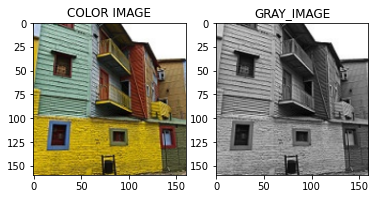

In [33]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1,2,1)
plt.title('COLOR IMAGE')
plt.imshow(color_image[1])

plt.subplot(1,2,2)
plt.title('GRAY_IMAGE')
plt.imshow(gray_image[1])

plt.show()

In [34]:
import numpy as np

x = np.array(gray_image)
y = np.array(color_image)

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2)

In [35]:
print(x_train.shape)
print(y_train.shape)

(800, 160, 160, 3)
(800, 160, 160, 3)


In [36]:
H = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

25/25 [==============================] - 16s 638ms/step - loss: 0.0054 - accuracy: 0.4703 - val_loss: 0.0054 - val_accuracy: 0.5205
Epoch 34/50
25/25 [==============================] - 16s 637ms/step - loss: 0.0055 - accuracy: 0.4693 - val_loss: 0.0050 - val_accuracy: 0.5507
Epoch 35/50
25/25 [==============================] - 16s 637ms/step - loss: 0.0054 - accuracy: 0.4803 - val_loss: 0.0055 - val_accuracy: 0.5050
Epoch 36/50
25/25 [==============================] - 16s 634ms/step - loss: 0.0053 - accuracy: 0.4889 - val_loss: 0.0050 - val_accuracy: 0.4583
Epoch 37/50
25/25 [==============================] - 16s 636ms/step - loss: 0.0055 - accuracy: 0.4550 - val_loss: 0.0050 - val_accuracy: 0.5738
Epoch 38/50
25/25 [==============================] - 16s 636ms/step - loss: 0.0054 - accuracy: 0.4734 - val_loss: 0.0048 - val_accuracy: 0.5039
Epoch 39/50
25/25 [==============================] - 16s 635ms/step - loss: 0.0055 - accuracy: 0.4752 - val_loss: 0.0063 - val_accuracy: 0.3912
Epoc

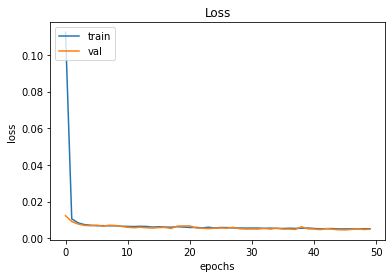

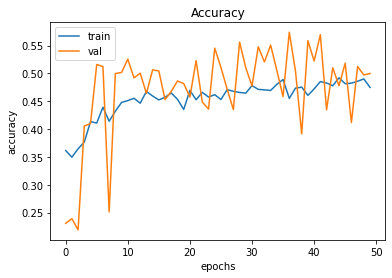

In [37]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.legend(['train', 'val'], loc='upper left')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.legend(['train', 'val'], loc='upper left')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

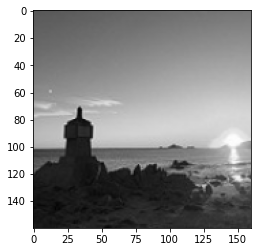

In [38]:
x_test = []
img_test = cv2.imread('/content/drive/MyDrive/colab/hoc lai/gray_color/2790_gray.jpg')
img_test = cv2.resize(img_test, (160,160))
img_test = img_test.astype('float32') / 255.0
x_test.append(img_test)

plt.imshow(x_test[0])

In [39]:
x_test = np.array(x_test)
y_pred = model.predict(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


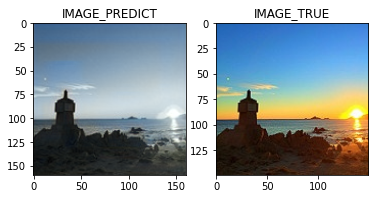

In [40]:
plt.figure()
plt.subplot(1,2,1)
plt.title('IMAGE_PREDICT')
plt.imshow(y_pred[0])
y_test = cv2.imread('/content/drive/MyDrive/colab/hoc lai/gray_color/2790.jpg')
y_test = cv2.cvtColor(y_test, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,2)
plt.title('IMAGE_TRUE')
plt.imshow(y_test)